In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [ ]:
#Reading the data
galaxies = pd.read_csv('/content/GalaxyZoo1_DR_table2.csv')
galaxies.head()

,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
0,587727178986356823,00:00:00.41,-10:22:25.7,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1
1,587727227300741210,00:00:00.74,-09:13:20.2,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0
2,587727225153257596,00:00:01.03,-10:56:48.0,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1
3,587730774962536596,00:00:01.38,+15:30:35.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0
4,587731186203885750,00:00:01.55,-00:05:33.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1


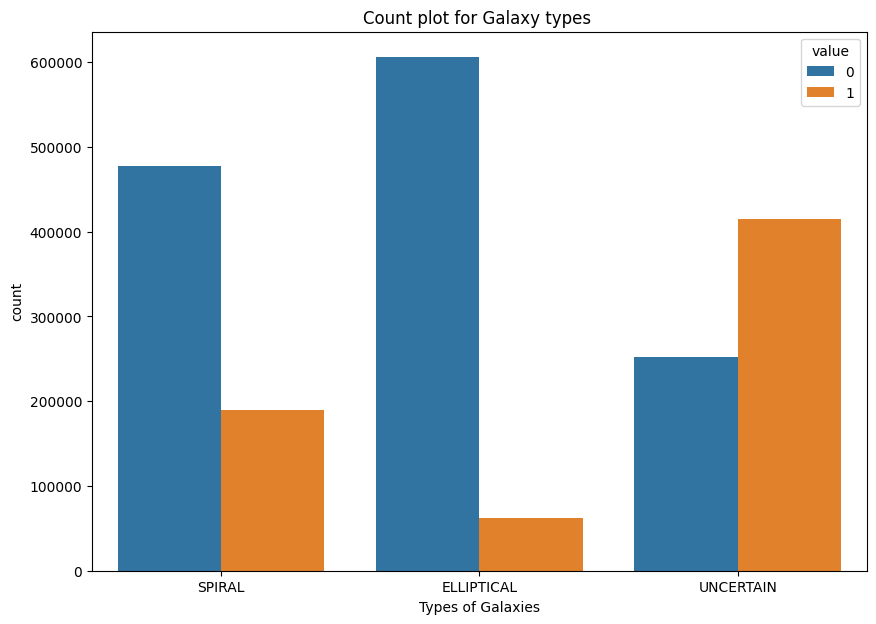

In [ ]:
def plot_shape_of_galaxies(galaxies):
    plt.figure(figsize=(10,7))
    plt.title('Count plot for Galaxy types ')
    countplt = galaxies[['SPIRAL','ELLIPTICAL','UNCERTAIN']]
    sns.countplot(x="variable",hue='value', data=pd.melt(countplt))
    plt.xlabel('Types of Galaxies')
    plt.show()
plot_shape_of_galaxies(galaxies)

In [ ]:
# create a new column by combining the three columns and assigning new values
galaxies['SHAPE_OF_GALAXY'] = galaxies['SPIRAL'] * 0 + galaxies['ELLIPTICAL'] * 1 + galaxies['UNCERTAIN'] * 2

In [ ]:
galaxies = galaxies.drop(['SPIRAL','UNCERTAIN','ELLIPTICAL', 'OBJID','RA','DEC'], axis = 1)

In [ ]:
galaxies.head()

,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SHAPE_OF_GALAXY
0,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,2
1,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,0
2,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,2
3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,1
4,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,2


In [ ]:
galaxies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667944 entries, 0 to 667943
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NVOTE            667944 non-null  int64  
 1   P_EL             667944 non-null  float64
 2   P_CW             667944 non-null  float64
 3   P_ACW            667944 non-null  float64
 4   P_EDGE           667944 non-null  float64
 5   P_DK             667944 non-null  float64
 6   P_MG             667944 non-null  float64
 7   P_CS             667944 non-null  float64
 8   P_EL_DEBIASED    667944 non-null  float64
 9   P_CS_DEBIASED    667944 non-null  float64
 10  SHAPE_OF_GALAXY  667944 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 56.1 MB


In [ ]:
galaxies.corr()

,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SHAPE_OF_GALAXY
NVOTE,1.000000,-0.000662,-0.000152,-0.001669,0.007266,-0.004267,-0.006884,0.004044,-0.005177,0.006070,0.012303
P_EL,-0.000662,1.000000,-0.420773,-0.432358,-0.548519,0.028621,-0.191279,-0.902999,0.903393,-0.812099,0.494454
P_CW,-0.000152,-0.420773,1.000000,-0.106200,-0.087215,-0.161116,-0.034382,0.457162,-0.356594,0.397541,-0.295967
P_ACW,-0.001669,-0.432358,-0.106200,1.000000,-0.090583,-0.167326,-0.041108,0.471989,-0.368682,0.412667,-0.307424
P_EDGE,0.007266,-0.548519,-0.087215,-0.090583,1.000000,-0.201243,-0.134162,0.620166,-0.562871,0.629252,-0.403774
P_DK,-0.004267,0.028621,-0.161116,-0.167326,-0.201243,1.000000,0.086649,-0.340454,0.030720,-0.349937,0.421910
P_MG,-0.006884,-0.191279,-0.034382,-0.041108,-0.134162,0.086649,1.000000,-0.142068,-0.104023,-0.208938,0.194523
P_CS,0.004044,-0.902999,0.457162,0.471989,0.620166,-0.340454,-0.142068,1.000000,-0.837742,0.936195,-0.650156
P_EL_DEBIASED,-0.005177,0.903393,-0.356594,-0.368682,-0.562871,0.030720,-0.104023,-0.837742,1.000000,-0.901336,0.446427
P_CS_DEBIASED,0.006070,-0.812099,0.397541,0.412667,0.629252,-0.349937,-0.208938,0.936195,-0.901336,1.000000,-0.615888


In [ ]:
galaxies.nunique()

NVOTE               89
P_EL               906
P_CW               889
P_ACW              890
P_EDGE             896
P_DK               815
P_MG               836
P_CS               903
P_EL_DEBIASED      990
P_CS_DEBIASED      989
SHAPE_OF_GALAXY      3
dtype: int64

In [ ]:
y = galaxies['SHAPE_OF_GALAXY']
X = galaxies.drop(['SHAPE_OF_GALAXY'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)
y_train = y_train.fillna(3.0)
y_train.nunique()
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=13)

Epoch 1/13
14612/14612 [==============================] - 56s 3ms/step - loss: 0.3303 - accuracy: 0.8570
Epoch 2/13
14612/14612 [==============================] - 50s 3ms/step - loss: 0.2766 - accuracy: 0.8775
Epoch 3/13
14612/14612 [==============================] - 47s 3ms/step - loss: 0.2727 - accuracy: 0.8806
Epoch 4/13
14612/14612 [==============================] - 49s 3ms/step - loss: 0.2704 - accuracy: 0.8819
Epoch 5/13
14612/14612 [==============================] - 49s 3ms/step - loss: 0.2671 - accuracy: 0.8831
Epoch 6/13
14612/14612 [==============================] - 48s 3ms/step - loss: 0.2645 - accuracy: 0.8842
Epoch 7/13
14612/14612 [==============================] - 47s 3ms/step - loss: 0.2605 - accuracy: 0.8860
Epoch 8/13
14612/14612 [==============================] - 47s 3ms/step - loss: 0.2578 - accuracy: 0.8871
Epoch 9/13
14612/14612 [==============================] - 47s 3ms/step - loss: 0.2547 - accuracy: 0.8892
Epoch 10/13
14612/14612 [==============================

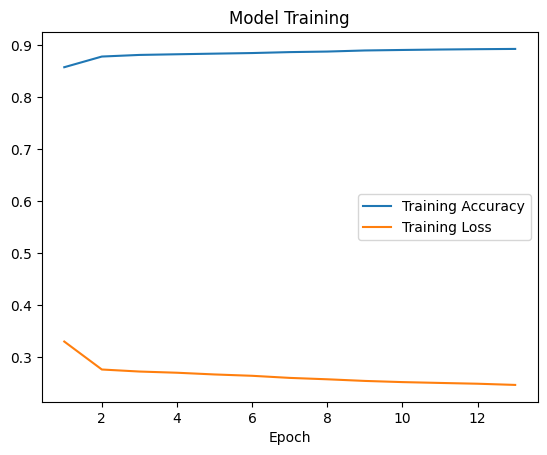

In [ ]:
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

epochs = np.arange(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, train_loss, label='Training Loss')
plt.title('Model Training')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scipy.stats import randint as sp_randint

def create_model(units=10, activation='relu', optimizer='adam'):
    model = keras.models.Sequential([
        keras.layers.Dense(units, activation=activation, input_shape=(X_train.shape[1],)),
        keras.layers.Dense(7, activation=activation),
        keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

param_dist = {
    'units': sp_randint(5, 50),
    'activation': ['relu', 'sigmoid'],
    'optimizer': ['adam', 'sgd']
}

model = KerasRegressor(build_fn=create_model, epochs=8, verbose=0)

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, n_iter=10)
random_search_result = random_search.fit(X_train, y_train)

print(f"Best: {-1*random_search_result.best_score_} using {random_search_result.best_params_} \n\n")
means = random_search_result.cv_results_['mean_test_score']
stds = random_search_result.cv_results_['std_test_score']
params = random_search_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{-1*mean:.4f} ({stdev:.4f}) with: {param}")

# Train the best model with the full dataset
best_model = create_model(**random_search_result.best_params_)
best_model.fit(X_train, y_train, epochs=8)


<ipython-input-16-7b25c5a80c38>:21: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=8, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: 0.04850703850388527 using {'activation': 'relu', 'optimizer': 'adam', 'units': 40} 


0.0801 (0.0053) with: {'activation': 'sigmoid', 'optimizer': 'sgd', 'units': 25}
0.0505 (0.0023) with: {'activation': 'relu', 'optimizer': 'adam', 'units': 35}
0.1084 (0.0469) with: {'activation': 'relu', 'optimizer': 'sgd', 'units': 7}
0.1073 (0.0476) with: {'activation': 'relu', 'optimizer': 'sgd', 'units': 14}
0.0501 (0.0017) with: {'activation': 'sigmoid', 'optimizer': 'adam', 'units': 28}
0.0497 (0.0007) with: {'activation': 'sigmoid', 'optimizer': 'adam', 'units': 15}
0.0485 (0.0005) with: {'activation': 'relu', 'optimizer': 'adam', 'units': 40}
0.0825 (0.0107) with: {'activation': 'sigmoid', 'optimizer': 'sgd', 'units': 30}
0.0936 (0.0575) with: {'activation': 'relu', 'optimizer': 'adam', 'units': 38}
0.0508 (0.0016) with: {'activation': 'relu', 'optimizer': 'adam', 'units': 42}
Epoch 1/8
14612/14612 [==============================] - 47s 3ms/step - loss: 0.3327 - accuracy: 0.8559
Epoch 2

In [ ]:
import sklearn

# Predict using the test set
y_pred = best_model.predict(X_test)

# Convert the predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert the one-hot encoded labels to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate and print the accuracy score
accuracy_score = sklearn.metrics.accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy score: {accuracy_score}")


6262/6262 [==============================] - 14s 2ms/step
Accuracy score: 0.8968979559246247


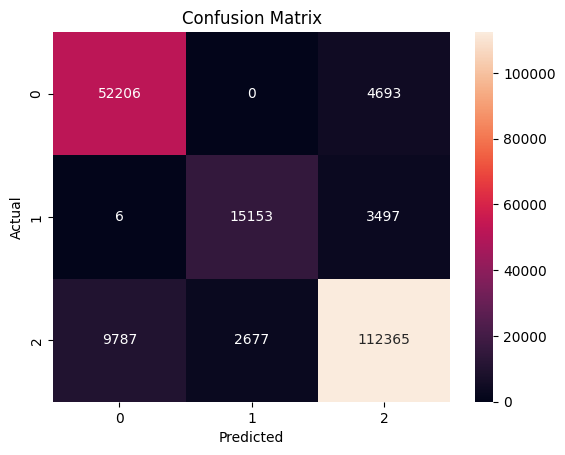

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()